In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [39]:
train_data.shape , test_data.shape

((42000, 785), (28000, 784))

In [40]:
X = train_data.drop(columns=['label'], axis=1)
y = train_data['label']

In [41]:
X = X.astype('float32') / 255.0

test_data = test_data.astype('float32') / 255.0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
test_data = test_data.values

In [44]:
# Reshape numpy arrays for 2D format 28x28

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

test_data = test_data.reshape(-1, 28, 28, 1)

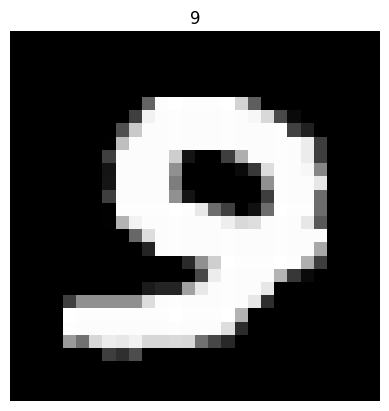

In [45]:
# Visualising data and labels
plt.imshow(X_train[3], cmap='gray')
plt.title(y_train[3])
plt.axis('off')
plt.show()

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [47]:
Y_train_cat = to_categorical(y_train)
Y_test_cat = to_categorical(y_test)

In [48]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(
    X_train, Y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose = 1,
)

Epoch 1/10
840/840 [==============================] - 6s 7ms/step - loss: 0.2873 - accuracy: 0.9113 - val_loss: 0.0664 - val_accuracy: 0.9817
Epoch 2/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1022 - accuracy: 0.9707 - val_loss: 0.0571 - val_accuracy: 0.9839
Epoch 3/10
840/840 [==============================] - 6s 8ms/step - loss: 0.0743 - accuracy: 0.9786 - val_loss: 0.0567 - val_accuracy: 0.9845
Epoch 4/10
840/840 [==============================] - 6s 7ms/step - loss: 0.0638 - accuracy: 0.9822 - val_loss: 0.0533 - val_accuracy: 0.9835
Epoch 5/10
840/840 [==============================] - 6s 7ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0410 - val_accuracy: 0.9879
Epoch 6/10
840/840 [==============================] - 5s 7ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0444 - val_accuracy: 0.9890
Epoch 7/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0514 - val_accuracy: 0.9884
Epoch 

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test_cat, verbose=2)
print(f'Test accuracy:, {test_accuracy:.3f}')

263/263 - 1s - loss: 0.0540 - accuracy: 0.9880 - 680ms/epoch - 3ms/step
Test accuracy:, 0.988


In [52]:
# Predictions for test_data

predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 2s 2ms/step


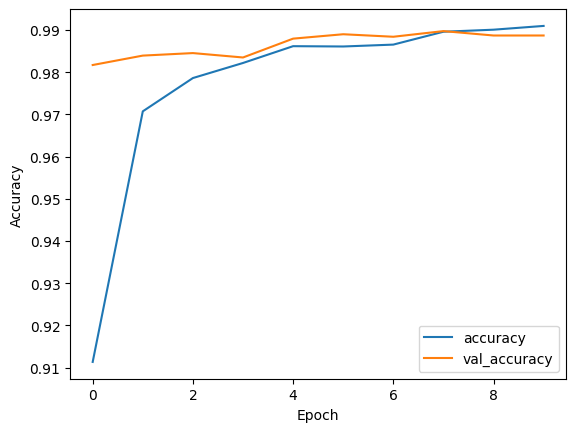

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()